In [58]:
#First I'm using Decision Tree#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [59]:
df=pd.read_csv("file")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


In [60]:
inputs=df.drop(["Loan_Status"],axis="columns")
inputs

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [61]:
target=df["Loan_Status"]
target

0      Y
1      Y
2      Y
3      Y
4      Y
      ..
362    Y
363    Y
364    Y
365    Y
366    Y
Name: Loan_Status, Length: 367, dtype: object

In [62]:
from sklearn.preprocessing import LabelEncoder
le_Loan_ID=LabelEncoder()
le_Married=LabelEncoder()
le_ApplicantIncome=LabelEncoder()
le_CoapplicantIncome=LabelEncoder()
le_LoanAmount=LabelEncoder()
le_Loan_Amount_Term=LabelEncoder()
le_Credit_History=LabelEncoder()
le_Property_Area=LabelEncoder()



In [63]:
inputs['Loan_ID_n']=le_Loan_ID.fit_transform(inputs['Loan_ID'])
inputs['Married_n']=le_Married.fit_transform(inputs['Married'])
inputs["ApplicantIncome_n"]=le_ApplicantIncome.fit_transform(inputs["ApplicantIncome"])
inputs["CoapplicantIncome_n"]=le_CoapplicantIncome.fit_transform(inputs["CoapplicantIncome"])
inputs["LoanAmount_n"]=le_LoanAmount.fit_transform(inputs["LoanAmount"])
inputs["Loan_Amount_Term_n"]=le_Loan_Amount_Term.fit_transform(inputs["Loan_Amount_Term"])
inputs["Credit_History_n"]=le_Credit_History.fit_transform(inputs["Credit_History"])
inputs["Property_Area_n"]=le_Property_Area.fit_transform(inputs["Property_Area"])

In [64]:
inputs

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_ID_n,Married_n,ApplicantIncome_n,CoapplicantIncome_n,LoanAmount_n,Loan_Amount_Term_n,Credit_History_n,Property_Area_n
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0,1,251,0,52,10,1,2
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1,1,102,43,67,10,1,2
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,2,1,230,67,119,10,1,2
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,3,1,43,110,42,10,2,2
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4,0,120,0,25,10,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,362,1,177,65,54,10,1,2
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,363,1,186,12,56,10,1,2
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,364,0,117,75,67,10,7,1
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,365,1,230,101,94,10,1,0


In [65]:
inputs_n=inputs.drop(["Loan_ID",'Married',"ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area","Gender","Education","Dependents","Self_Employed"],axis="columns")



In [66]:
inputs_n

,Loan_ID_n,Married_n,ApplicantIncome_n,CoapplicantIncome_n,LoanAmount_n,Loan_Amount_Term_n,Credit_History_n,Property_Area_n
0,0,1,251,0,52,10,1,2
1,1,1,102,43,67,10,1,2
2,2,1,230,67,119,10,1,2
3,3,1,43,110,42,10,2,2
4,4,0,120,0,25,10,1,2
...,...,...,...,...,...,...,...,...
362,362,1,177,65,54,10,1,2
363,363,1,186,12,56,10,1,2
364,364,0,117,75,67,10,7,1
365,365,1,230,101,94,10,1,0


In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_n,target,train_size=0.30)



In [68]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [69]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
x_test

,Loan_ID_n,Married_n,ApplicantIncome_n,CoapplicantIncome_n,LoanAmount_n,Loan_Amount_Term_n,Credit_History_n,Property_Area_n
293,293,1,33,77,33,10,0,2
348,348,1,129,36,74,10,1,2
0,0,1,251,0,52,10,1,2
257,257,1,122,173,96,10,1,2
104,104,0,34,92,49,10,13,1
...,...,...,...,...,...,...,...,...
232,232,1,4,52,0,6,1,0
211,211,0,242,102,118,10,0,0
188,188,1,302,0,144,10,1,0
185,185,1,205,0,74,10,8,1


In [71]:
y_pred=model.predict(x_test)
y_pred

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [72]:
y_test

293    N
348    Y
0      Y
257    Y
104    Y
      ..
232    Y
211    N
188    Y
185    Y
303    Y
Name: Loan_Status, Length: 257, dtype: object

In [73]:
model.predict_proba(x_test)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [75]:
model.score(x_test,y_test)  

0.9961089494163424

In [76]:
#Logistic Regression#
inputs_n

,Loan_ID_n,Married_n,ApplicantIncome_n,CoapplicantIncome_n,LoanAmount_n,Loan_Amount_Term_n,Credit_History_n,Property_Area_n
0,0,1,251,0,52,10,1,2
1,1,1,102,43,67,10,1,2
2,2,1,230,67,119,10,1,2
3,3,1,43,110,42,10,2,2
4,4,0,120,0,25,10,1,2
...,...,...,...,...,...,...,...,...
362,362,1,177,65,54,10,1,2
363,363,1,186,12,56,10,1,2
364,364,0,117,75,67,10,7,1
365,365,1,230,101,94,10,1,0


In [152]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_n,target,train_size=0.30)


In [153]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()

In [154]:
mod.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
x_test

,Loan_ID_n,Married_n,ApplicantIncome_n,CoapplicantIncome_n,LoanAmount_n,Loan_Amount_Term_n,Credit_History_n,Property_Area_n
98,98,1,295,0,12,10,1,2
115,115,0,191,167,93,10,19,1
314,314,0,155,0,73,8,1,2
332,332,1,143,119,102,10,1,2
214,214,1,153,153,59,17,1,0
...,...,...,...,...,...,...,...,...
195,195,0,255,0,57,10,1,2
193,193,1,65,76,68,10,0,0
317,317,1,11,127,16,10,0,2
336,336,0,94,77,83,10,28,2


In [156]:
y_pred=mod.predict(x_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y

In [157]:
mod.predict_proba(x_test)

array([[5.74350424e-03, 9.94256496e-01],
       [0.00000000e+00, 1.00000000e+00],
       [4.69909855e-02, 9.53009015e-01],
       [7.56811560e-02, 9.24318844e-01],
       [6.47500290e-02, 9.35249971e-01],
       [2.10698638e-02, 9.78930136e-01],
       [0.00000000e+00, 1.00000000e+00],
       [5.76190573e-01, 4.23809427e-01],
       [2.44961348e-02, 9.75503865e-01],
       [2.87664391e-02, 9.71233561e-01],
       [6.71557834e-01, 3.28442166e-01],
       [4.68153834e-02, 9.53184617e-01],
       [3.88502796e-02, 9.61149720e-01],
       [2.07900763e-02, 9.79209924e-01],
       [1.31165903e-02, 9.86883410e-01],
       [3.18478342e-02, 9.68152166e-01],
       [3.08386416e-02, 9.69161358e-01],
       [9.90467084e-02, 9.00953292e-01],
       [7.59265313e-02, 9.24073469e-01],
       [8.72985753e-01, 1.27014247e-01],
       [5.88046459e-02, 9.41195354e-01],
       [1.21358869e-01, 8.78641131e-01],
       [4.37865431e-02, 9.56213457e-01],
       [9.39899171e-02, 9.06010083e-01],
       [6.317670

In [158]:
mod.score(x_test,y_test)

0.9883268482490273

In [124]:
#SVM#
inputs_n

,Loan_ID_n,Married_n,ApplicantIncome_n,CoapplicantIncome_n,LoanAmount_n,Loan_Amount_Term_n,Credit_History_n,Property_Area_n
0,0,1,251,0,52,10,1,2
1,1,1,102,43,67,10,1,2
2,2,1,230,67,119,10,1,2
3,3,1,43,110,42,10,2,2
4,4,0,120,0,25,10,1,2
...,...,...,...,...,...,...,...,...
362,362,1,177,65,54,10,1,2
363,363,1,186,12,56,10,1,2
364,364,0,117,75,67,10,7,1
365,365,1,230,101,94,10,1,0


In [183]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_n,target,train_size=0.30)

In [184]:
from sklearn.svm import SVC  
models=SVC()

In [185]:
models.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [186]:
x_test

,Loan_ID_n,Married_n,ApplicantIncome_n,CoapplicantIncome_n,LoanAmount_n,Loan_Amount_Term_n,Credit_History_n,Property_Area_n
339,339,0,196,95,97,10,0,0
358,358,1,107,0,23,10,4,0
249,249,0,88,0,3,6,1,0
149,149,0,256,0,88,10,1,2
321,321,1,10,62,107,10,1,2
...,...,...,...,...,...,...,...,...
261,261,1,91,48,52,10,1,1
221,221,1,132,90,87,10,1,0
82,82,1,184,0,87,11,0,0
145,145,0,301,0,88,8,1,2


In [187]:
y_pred=models.predict(x_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [188]:
models.score(x_test,y_test)

0.8521400778210116

In [93]:
#K means Clustering#
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [94]:
scaler.fit(inputs_n)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [95]:
scaled_features=scaler.transform(inputs_n)

In [96]:
feat=pd.DataFrame(scaled_features,columns=inputs_n.columns[:])
feat.head()

,Loan_ID_n,Married_n,ApplicantIncome_n,CoapplicantIncome_n,LoanAmount_n,Loan_Amount_Term_n,Credit_History_n,Property_Area_n
0,-1.727338,0.758358,1.047362,-0.861345,-0.496772,0.233269,-0.216365,1.118764
1,-1.717899,0.758358,-0.618855,-0.175909,-0.071266,0.233269,-0.216365,1.118764
2,-1.708460,0.758358,0.812526,0.206660,1.403822,0.233269,-0.216365,1.118764
3,-1.699021,0.758358,-1.278633,0.892096,-0.780442,0.233269,-0.005179,1.118764
4,-1.689582,-1.318638,-0.417567,-0.861345,-1.262683,0.233269,-0.216365,1.118764


In [97]:
target

0      Y
1      Y
2      Y
3      Y
4      Y
      ..
362    Y
363    Y
364    Y
365    Y
366    Y
Name: Loan_Status, Length: 367, dtype: object

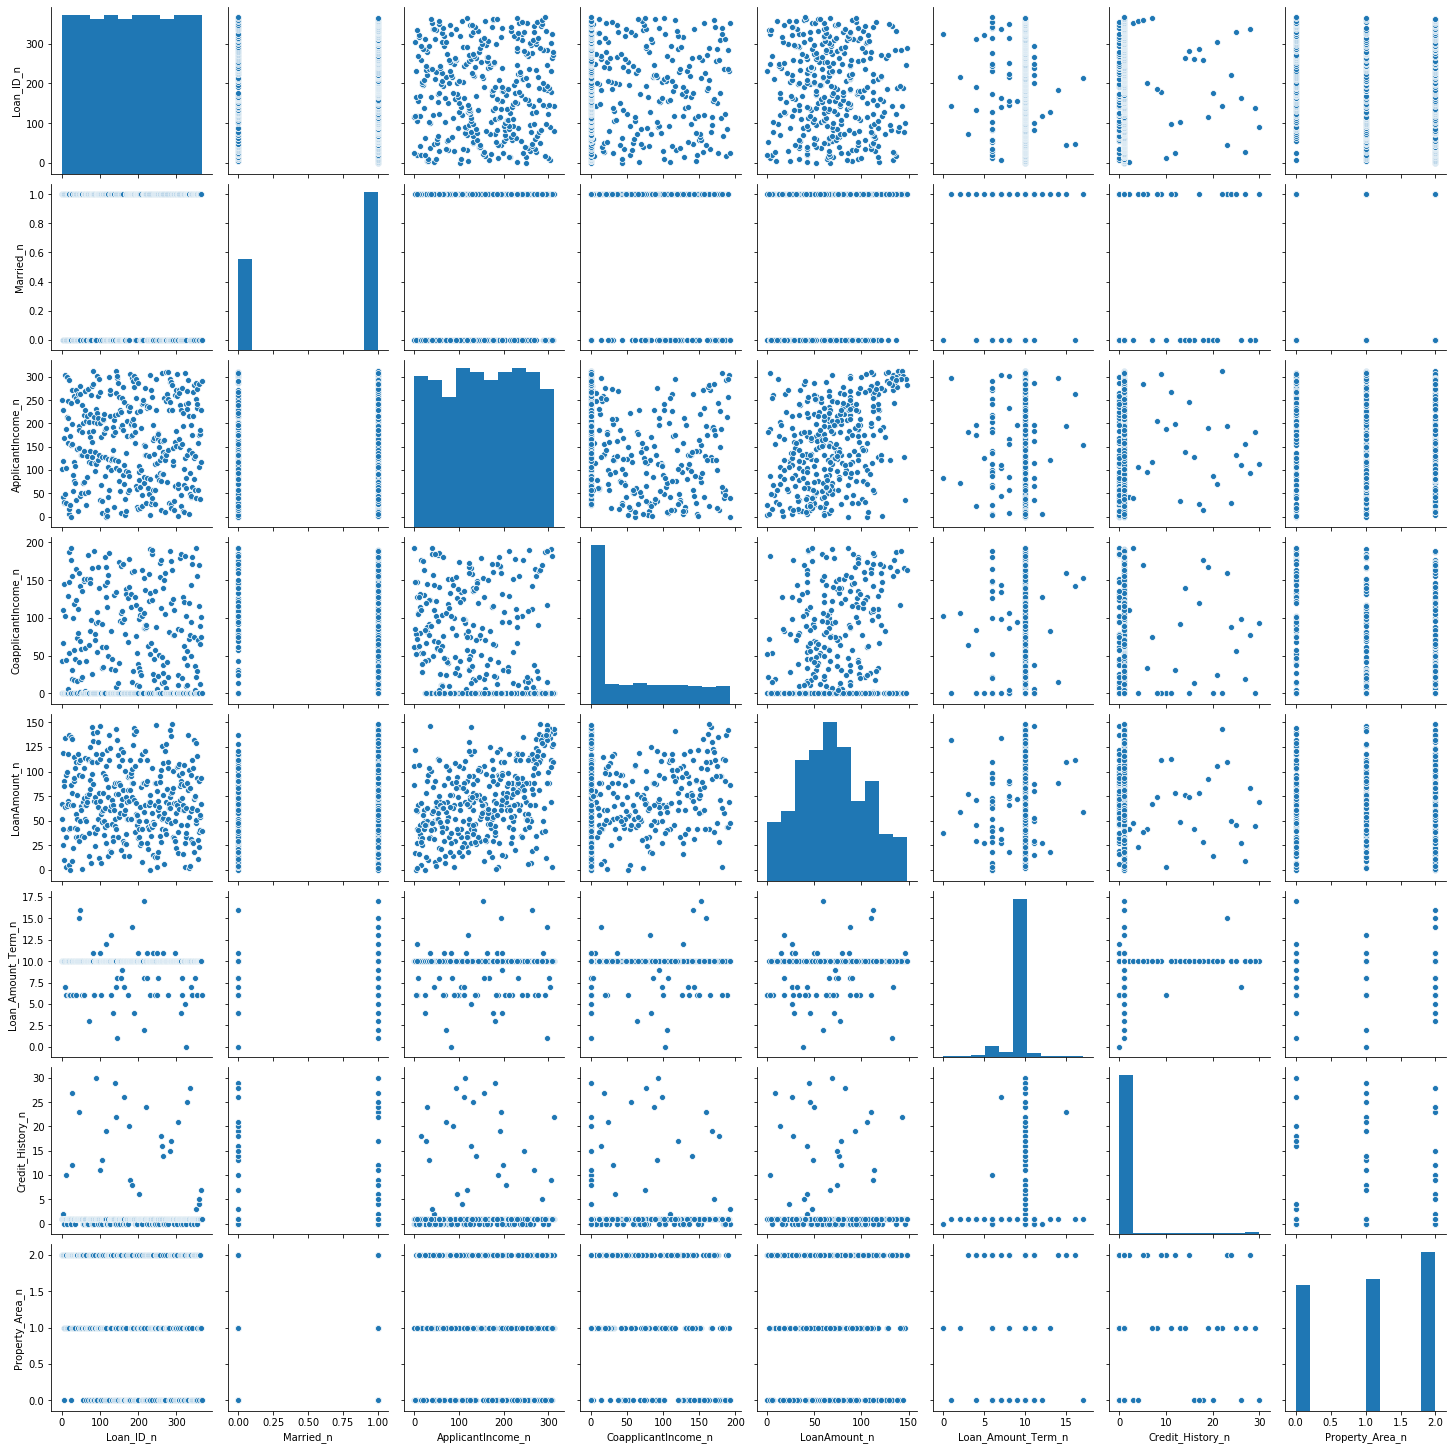

In [98]:
import seaborn as sns
sns.pairplot(inputs_n)
plt.show()

## from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_n,target,train_size=0.0)

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn=KNeighborsClassifier(n_neighbors=1)

In [101]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [102]:
x_test

,Loan_ID_n,Married_n,ApplicantIncome_n,CoapplicantIncome_n,LoanAmount_n,Loan_Amount_Term_n,Credit_History_n,Property_Area_n
202,202,1,95,34,42,10,6,2
298,298,1,151,0,58,10,1,1
16,16,1,211,129,118,10,1,2
116,116,0,0,61,106,10,1,1
332,332,1,143,119,102,10,1,2
...,...,...,...,...,...,...,...,...
271,271,0,122,160,121,10,1,0
73,73,1,170,83,125,10,1,0
261,261,1,91,48,52,10,1,1
166,166,0,3,79,61,10,0,2


In [103]:
ypred=knn.predict(x_test)
ypred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [104]:
knn.score(x_test,y_test)

0.7315175097276264

In [105]:
#Choosing K value#
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
accuracy_rate=[]
for i in range(1,40):
 knn=KNeighborsClassifier(n_neighbors=i)
 score=cross_val_score(knn,feat,target,cv=10)
 accuracy_rate.append(score.mean())

In [106]:
error_rate=[]
for i in range(1,40):
 knn=KNeighborsClassifier(n_neighbors=i)
 score=cross_val_score(knn,feat,target,cv=10)
 error_rate.append(1-score.mean())

In [107]:
error_rate=[]
for i in range(1,40):
 knn=KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i=knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error value')

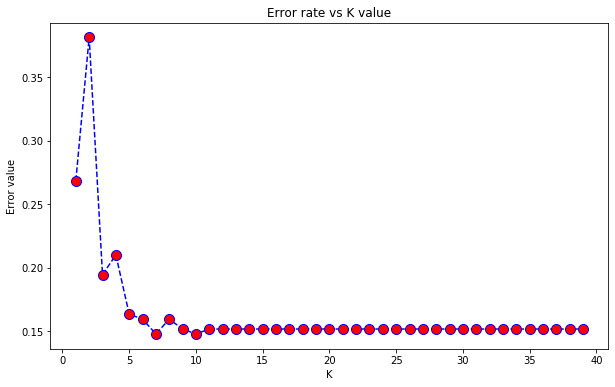

In [108]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue",marker="o",linestyle="dashed",markerfacecolor="red",markersize=10)
plt.title("Error rate vs K value")
plt.xlabel("K")
plt.ylabel("Error value")

In [189]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
ypred=knn.predict(x_test)
print("With k=10")
print('\n')
print(confusion_matrix(y_test,ypred))
print('\n')
print(classification_report(y_test,ypred))


With k=10


[[  4  34]
 [  3 216]]


              precision    recall  f1-score   support

           N       0.57      0.11      0.18        38
           Y       0.86      0.99      0.92       219

    accuracy                           0.86       257
   macro avg       0.72      0.55      0.55       257
weighted avg       0.82      0.86      0.81       257



In [190]:
knn.score(x_test,y_test)

0.8560311284046692